In [1]:
import numpy as np
import pandas as pd
import func

from keras import models
from keras import layers
from keras import optimizers

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#데이터로드
train = np.loadtxt("train.csv", delimiter=',', dtype=np.float32) #42000,785
x_test = np.loadtxt("test.csv", delimiter=',', dtype=np.float32) #42000,784

In [3]:
#데이터분할
x_train = train[:, 1:]
y_train = train[:, 0]

#데이터 정규화
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [5]:
#원핫인코딩
y_train = func.to_categori(y_train)

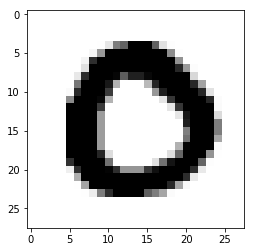

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
func.show_data(x_train[4], y_train[4])

In [32]:
model = models.Sequential()
model.add(layers.Dense(5000, activation='relu', input_shape=(784,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=0.001), loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=100)


Epoch 1/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.0114 - acc: 0.9226
Epoch 2/100
42000/42000 [==============================] - 2s 46us/step - loss: 0.0048 - acc: 0.9688
Epoch 3/100
42000/42000 [==============================] - 2s 48us/step - loss: 0.0037 - acc: 0.9763
Epoch 4/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0030 - acc: 0.9811
Epoch 5/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0023 - acc: 0.9861
Epoch 6/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0022 - acc: 0.9862
Epoch 7/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0018 - acc: 0.9890
Epoch 8/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0017 - acc: 0.9898
Epoch 9/100
42000/42000 [==============================] - 2s 46us/step - loss: 0.0016 - acc: 0.9897
Epoch 10/100
42000/42000 [==============================] - 2s 47us/step - loss: 0.0012 - a

42000/42000 [==============================] - 2s 43us/step - loss: 5.4262e-04 - acc: 0.9971
Epoch 80/100
42000/42000 [==============================] - 2s 42us/step - loss: 9.0138e-04 - acc: 0.9953
Epoch 81/100
42000/42000 [==============================] - 2s 43us/step - loss: 7.3291e-04 - acc: 0.9960
Epoch 82/100
42000/42000 [==============================] - 2s 43us/step - loss: 8.5262e-04 - acc: 0.9955
Epoch 83/100
42000/42000 [==============================] - 2s 43us/step - loss: 8.2143e-04 - acc: 0.9956
Epoch 84/100
42000/42000 [==============================] - 2s 43us/step - loss: 7.3480e-04 - acc: 0.9961
Epoch 85/100
42000/42000 [==============================] - 2s 43us/step - loss: 8.4381e-04 - acc: 0.9955
Epoch 86/100
42000/42000 [==============================] - 2s 43us/step - loss: 6.3378e-04 - acc: 0.9966
Epoch 87/100
42000/42000 [==============================] - 2s 43us/step - loss: 6.1733e-04 - acc: 0.9968
Epoch 88/100
42000/42000 [==============================] -

In [33]:
y_test = model.predict(x_test)
y_test = func.to_value(y_test)
print(y_test.shape)
print(y_test.dtype)

(28000,)
float64


In [34]:
ld = np.arange(1,28001,1)
print(ld.shape)
print(ld.dtype)

(28000,)
int64


In [35]:
y_test = y_test.astype('uint8')
print(y_test.dtype)

uint8


In [36]:
dataframe = pd.DataFrame({'ImageId':ld, 'label': y_test})
dataframe.to_csv("submission.csv", index=False)